In [1]:
#import library
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn
import statistics
from imblearn.over_sampling import SMOTE

In [2]:
# check version number
import imblearn
print(imblearn.__version__)

0.9.1


In [3]:
#Import Dataset
df = pd.read_csv('https://raw.githubusercontent.com/Alexander-3112/ALP---Project-Dataset-Terapi/main/Dataset_Terapi_Kelenjar_Getah_Bening.csv')
df.head(5)

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0


In [4]:
#Data cleansing
#check missing value
import pandas as pd
import seaborn as sns
df.isna().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
#Exploratory Data Analysis(EDA)
df.describe()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
count,90.000000,90.000000,87.000000,89.000000,85.000000,90.000000,88.000000,90.000000
mean,1.544444,31.044444,7.221264,6.123596,1.752941,95.700000,14.500000,0.788889
std,0.500811,12.235435,3.151325,4.231431,0.829599,136.614643,17.378147,0.410383
min,1.000000,15.000000,1.000000,1.000000,1.000000,6.000000,2.000000,0.000000
25%,1.000000,20.250000,5.000000,2.000000,1.000000,35.500000,5.000000,1.000000
50%,2.000000,28.500000,7.750000,6.000000,2.000000,53.000000,7.000000,1.000000
75%,2.000000,41.750000,10.000000,9.000000,2.000000,80.750000,9.000000,1.000000
max,2.000000,56.000000,12.000000,19.000000,3.000000,900.000000,70.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 87 non-null     float64
 3   Number_of_Warts      89 non-null     float64
 4   Type                 85 non-null     float64
 5   Area                 90 non-null     int64  
 6   induration_diameter  88 non-null     float64
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


In [8]:
df['Time'].replace([np.nan],df['Time'].mode()[0],inplace = True)
df['Number_of_Warts'].replace([np.nan],df['Number_of_Warts'].mode()[0],inplace = True)
df['Type'].replace([np.nan],df['Type'].mode()[0],inplace = True)
df['induration_diameter'].replace([np.nan],df['induration_diameter'].mode()[0],inplace = True)
df.fillna(0)

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,2.0,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.00,1.0,1.0,65,7.0,1
86,2,51,6.00,6.0,1.0,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.00,1.0,2.0,30,25.0,1


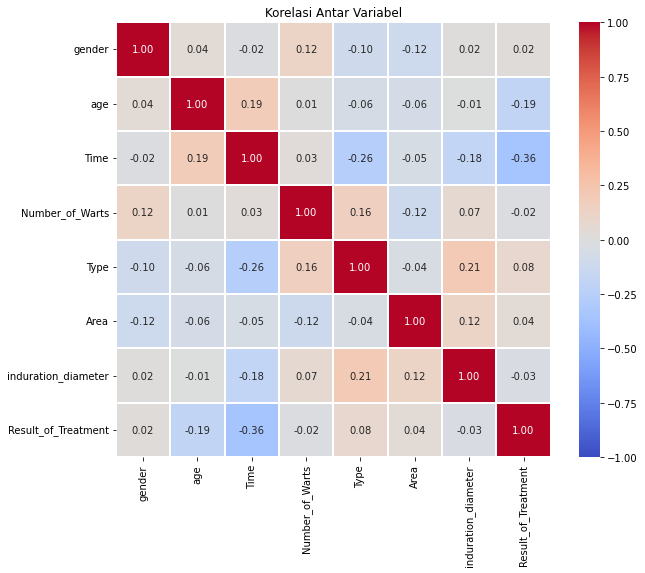

In [9]:
#heatmap
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1, vmax=1, cmap = "coolwarm", annot=True, fmt='.2f', linewidths=0.1, square = True)
plt.title("Korelasi Antar Variabel")
plt.show()

In [10]:
dfdrop = df.dropna()

In [11]:
#Variabel independent
X = dfdrop[['age']]
#Variabel Dependent
y = dfdrop['Time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=30)
#Regresi linear
lr = LinearRegression()
lr.fit(X_train,y_train)
#Memasukkan nilai prediksi
y_pred = lr.predict(X_test)
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))
def MAPE(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape
#Predict 
LR_Test_predict = lr.predict(X_test) 
#MAPE
LR_MAPE= MAPE(y_test,LR_Test_predict)
print("Mean Absolute Percentage Error (MAPE): ",LR_MAPE)

Root Mean Squared Error (RMSE):  3.193427583769673
Mean Absolute Percentage Error (MAPE):  50.95464177553875


In [12]:
##build baseline logistic regression
X=df.drop('Type', axis=1)
y=df['Type']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

         1.0       0.88      0.65      0.75        23
         2.0       0.00      0.00      0.00         0
         3.0       0.20      0.25      0.22         4

    accuracy                           0.59        27
   macro avg       0.36      0.30      0.32        27
weighted avg       0.78      0.59      0.67        27



C:\Users\alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alex\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureW

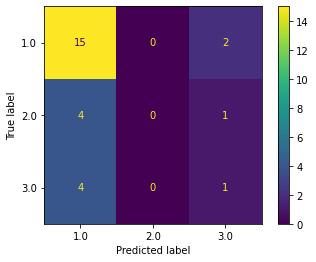

In [13]:
from sklearn.metrics import (plot_confusion_matrix,
                            classification_report,
                            plot_precision_recall_curve,
                            plot_roc_curve)
def report(model):
    preds = model.predict(X_test)
    print(classification_report(preds, y_test))
    plot_confusion_matrix(model, X_test, y_test)
    
print("LOGISTIC REGRESSION MODEL")
report(lr_model)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
df_type = df.dropna(subset=['Type'])
# variabel independent
X = df_type[['induration_diameter', 'Number_of_Warts']]
# Variabel Dependent
y = df_type ['Type']

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 20)
classifier = KNeighborsClassifier(metric = "euclidean")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[5 0 0]
 [1 0 0]
 [2 1 0]]
Accuracy Score:  0.5555555555555556


In [19]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [20]:
y_pred = model.predict_proba(X_test)
print(y_pred)

[[0.19785331 0.25506233 0.54708437]
 [0.05184374 0.25101042 0.69714584]
 [0.6620336  0.21671059 0.12125581]
 [0.64882284 0.2251736  0.12600356]
 [0.68138986 0.20469392 0.11391623]
 [0.46794534 0.28364379 0.24841087]
 [0.62368522 0.23577446 0.14054032]
 [0.71075617 0.18271817 0.10652566]
 [0.4741294  0.27873483 0.24713577]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm3)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

In [35]:
#Kmeans Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(init="random",n_clusters=5,max_iter=300,random_state=42)
model = kmeans.fit_predict(df)
model

C:\Users\alex\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 4, 1, 3, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 4, 1, 2, 2, 1, 1, 2, 0,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2,
       2, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1, 4, 1, 2, 1, 1, 2, 4, 1, 2, 3,
       1, 1, 1, 4, 1, 1, 1, 1, 2, 4, 0, 1, 1, 1, 1, 2, 3, 1, 1, 2, 2, 2,
       1, 2])

In [37]:
# set the parameter for evaluating K
wcss=[]
X2 = df[["age","Time"]]
# check the inertia for each K
for k in range(1,11):
    kmeans = KMeans(n_clusters= k, init="random")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)  

C:\Users\alex\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\alex\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\alex\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\alex\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

In [38]:
from kneed import KneeLocator
findknee = KneeLocator(range(1,11), wcss, curve="convex",direction="decreasing")
print("The best k for you model is", findknee.elbow)

The best k for you model is 3


In [39]:
kmeans = KMeans(n_clusters= 4, init="random")
kmeans.fit(X2)
wcss.append(kmeans.inertia_)

C:\Users\alex\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [40]:
df_kmeans = kmeans.predict(X2)
df_kmeans

array([2, 1, 3, 3, 3, 3, 0, 0, 0, 2, 1, 1, 3, 3, 3, 3, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

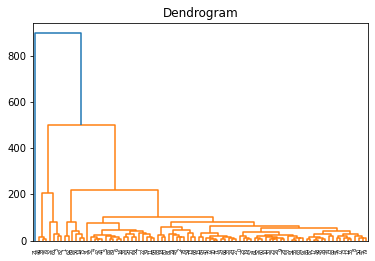

In [32]:
#Hierachical Clustering
from sklearn.cluster import AgglomerativeClustering # this line of code imports AgglomerativeClustering model from sk-learn
Agg_hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')
y_hc = Agg_hc.fit_predict(df) # model fitting on the dataset
import scipy.cluster.hierarchy as sch # importing scipy.cluster.hierarchy for dendrogram
dendrogram = sch.dendrogram(sch.linkage(df, method = 'complete')) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram') # title of the dendrogram
plt.show() # show the dendrogram

In [34]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
model.fit(df)
labels = model.labels_
labels

array([2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

<AxesSubplot:ylabel='Result_of_Treatment'>

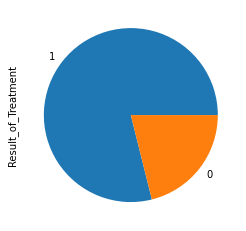

In [22]:
df.Result_of_Treatment.value_counts().plot(kind='pie')

C:\Users\alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result_of_Treatment', ylabel='count'>

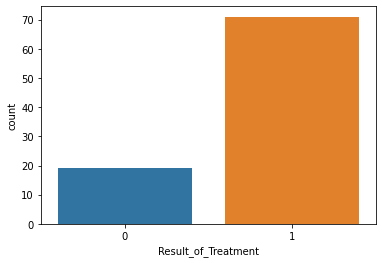

In [23]:
sns.countplot(df['Result_of_Treatment'])

In [24]:
#Menghilangkan imbalance pada dataset
from imblearn.over_sampling import SMOTE
a = df.drop(['Result_of_Treatment'],axis=1)
b = df['Result_of_Treatment']
sm = SMOTE(random_state=30)
x_sampling , y_sampling = sm.fit_resample(a,b)

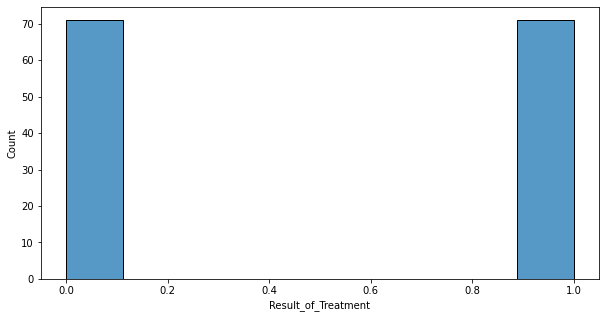

In [29]:
fig = plt.subplots(figsize=(10,5))
sns.histplot(data=y_sampling)
plt.show()